# Abstract:

### Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening a deposit account) in which your money will be returned back at a specific maturity time.

# Problem Statement:

### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on

# Variable Description:

### age=Age of the client
### job=Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
### marital=Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### education=(categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
### default=has credit in default? (categorical: 'no','yes','unknown')
### housing=has a housing loan? (categorical: 'no','yes','unknown')
### loan=has a personal loan? (categorical: 'no','yes','unknown')
### contact=contact communication type (categorical: 'cellular','telephone')
### month=last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
### day_of_week=last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
### duration=last contact duration, in seconds
### campaign=number of contacts performed during this campaign and for this client (numeric, includes last contact)
### pdays=number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
### previous=number of contacts performed before this campaign and for this client
### poutcome=outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### emp.var.rate= employment variation rate - quarterly indicator (numeric) 
### cons.price.idx =consumer price index - monthly indicator
### cons.conf.idx =consumer confidence index - monthly indicator
### euribor3m euribor 3 month rate - daily indicator
### nr.employed number of employees - quarterly indicator
###y= has the client subscribed a term deposit? (binary: 'yes','no')

# Import the required packages

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank-additional-full (1).csv",delimiter=";")  ## loading the dataset


In [3]:
df.head() # reading the first five rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape #printing number of rows and number of columns 

(41188, 21)

In [5]:
df.info() #printing all columns ,non null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [29]:
df.isnull().sum() # printing the null values

duration                0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 141, dtype: int64

In [7]:
# there are no null values in dataset

In [8]:
df.describe() # returns the statistical summary  for NUMERICAL DATA


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include='all') # returns the statistical summary  for  CATEGORICAL DATA


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [10]:
df.columns # reading the columns from dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df.job.unique() # reading all the unique values of job feature

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [12]:
df.info()   #  dataset size and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:xlabel='y', ylabel='count'>

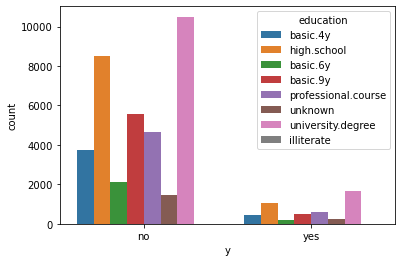

In [13]:
sns.countplot(x='y',hue='education',data=df)

<AxesSubplot:>

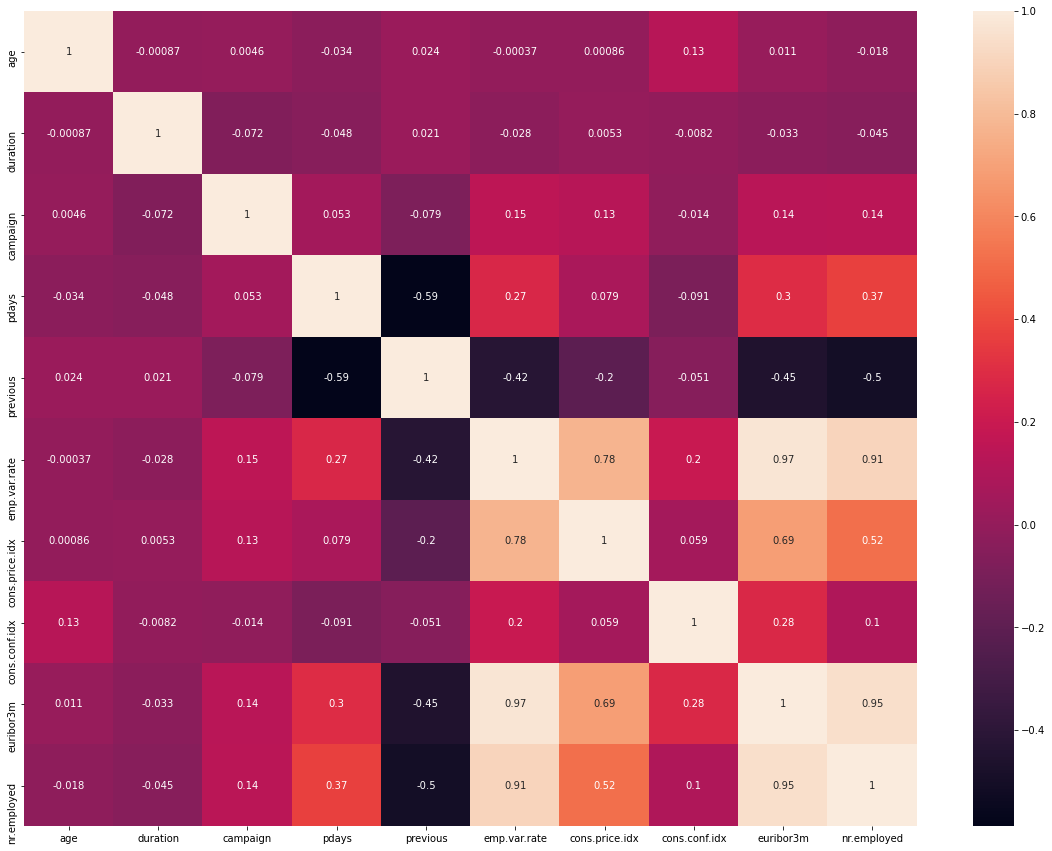

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)  # finding the correlation by using heat map

In [15]:
df=pd.get_dummies(df,columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome'])

In [16]:
df.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0


# Training Data and Testing Data Split

In [17]:
X=df.drop(labels="y" , axis=1)
y=df["y"]
X.head()


,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_17,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit the Model 

In [19]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma=0.025, C=3) 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [20]:
svm.score(X_train, y_train)

0.8871700600048559

In [21]:
svm.score(X_test, y_test)

0.8932588816055677

In [ ]:
# training score-
# testing score-

# StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.01047142, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.42150051, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.12451981, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [-0.26722482, -0.20490853,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.70856893, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.07438021,  0.15610492,  0.1954139 , ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

In [26]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma=0.025, C=3) 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [27]:
svm.score(X_train, y_train)

0.9060039540772086

In [28]:
svm.score(X_test, y_test)

0.903293679695719

In [ ]:
# training score- 0.9060039540772086
# testing score- 0.9060039540772086

  # conclusion

In [ ]:
 #  after  StandardScaler the model improved